# Auto-Encoder

In [ ]:
import tensorflow as tf
print(tf.__version__) 

2.0.0


In [ ]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

import numpy as np
import random

import matplotlib.pyplot as plt

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Using TensorFlow backend.


# New Section

In [ ]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
img_rows, img_cols, channels = 28, 28, 1
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


# Creating noisy data-set

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Training auto-enocder

In [ ]:

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.2397 - val_loss: 0.1929
Epoch 2/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1766 - val_loss: 0.1661
Epoch 3/25
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1621 - val_loss: 0.1544
Epoch 4/25
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1550 - val_loss: 0.1510
Epoch 5/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1501 - val_loss: 0.1487
Epoch 6/25
60000/60000 [==============================] - 84s 1ms/step - loss: 0.1466 - val_loss: 0.1425
Epoch 7/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1437 - val_loss: 0.1438
Epoch 8/25
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1416 - val_loss: 0.1388
Epoch 9/25
60000/60000 [==============================] - 83s 1ms/step - loss: 0.1400 - val_loss: 0.1369
Epoch

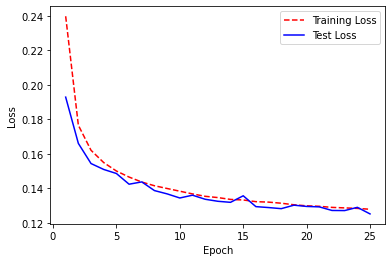

In [ ]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

# Classifier

In [ ]:
import tensorflow as tf
from tensorflow import keras


import numpy as np
import random

import matplotlib.pyplot as plt

def create_model():
  model = keras.Sequential()

  # Must define the input shape in the first layer of the neural network
  model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(pool_size=2))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.MaxPooling2D(pool_size=2))
  model.add(keras.layers.Dropout(0.3))

  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Dense(10, activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
  return model

# Take a look at the model summary
model = create_model()

# Training and Testing classifier

In [ ]:
model.fit(x_train, y_train, 
                    epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 98s 105ms/step - loss: 0.3651 - accuracy: 0.8891 - val_loss: 0.0676 - val_accuracy: 0.9792
Epoch 2/5
938/938 [==============================] - 97s 104ms/step - loss: 0.1460 - accuracy: 0.9568 - val_loss: 0.0421 - val_accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 97s 104ms/step - loss: 0.1175 - accuracy: 0.9654 - val_loss: 0.0347 - val_accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 98s 105ms/step - loss: 0.1009 - accuracy: 0.9707 - val_loss: 0.0346 - val_accuracy: 0.9896
Epoch 5/5
938/938 [==============================] - 99s 105ms/step - loss: 0.0903 - accuracy: 0.9740 - val_loss: 0.0393 - val_accuracy: 0.9888


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.0393 - accuracy: 0.9888


[0.03932730853557587, 0.9887999892234802]

# Adversial attack generation

In [ ]:
#Adversial attack function
def adversarial_pattern(image, label):
    image = tf.cast(image, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model1(image)
        loss = tf.keras.losses.MSE(label, prediction)
    
    gradient = tape.gradient(loss, image)
    
    signed_grad = tf.sign(gradient)
    
    return signed_grad


In [ ]:
#creating batch examples
#tf.enable_eager_execution()

def generate_adversarials(batch_size):
    while True:
        x = []
        y = []
        for batch in range(batch_size):
            N = random.randint(0, 100)

            label = y_train[N]
            image = x_train[N]
            
            #perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label).numpy()
            perturbations = adversarial_pattern(image.reshape((1, img_rows, img_cols, channels)), label)
            perturbations = np.array(perturbations)
            
            
            epsilon = 0.5
            adversarial = image + perturbations * epsilon
            
            x.append(adversarial)
            y.append(y_train[N])
        
        
        x = np.asarray(x).reshape((batch_size, img_rows, img_cols, channels))
        y = np.asarray(y)
        
        yield x, y

In [ ]:
import random
x_adversarial_train, y_adversarial_train = next(generate_adversarials(20000))
x_adversarial_test, y_adversarial_test = next(generate_adversarials(10000))

In [ ]:
x_adversarial_train.shape

(20000, 28, 28, 1)

# Denoising adversial image

In [ ]:
x_denoise_train = autoencoder.predict(x_adversarial_train)
x_denoise_test = autoencoder.predict(x_adversarial_test)

# Evaluation

In [ ]:
print("Base accuracy on adversarial images:", model.evaluate(x=x_adversarial_test, y=y_adversarial_test, verbose=0))

Base accuracy on adversarial images: [5.321493625640869, 0.29440000653266907]


In [ ]:
print("Base accuracy on adversarial images:", model.evaluate(x=x_adversarial_train, y=y_adversarial_train, verbose=0))

Base accuracy on adversarial images: [5.279727458953857, 0.29725000262260437]


In [ ]:
print("Defended accuracy on adversarial images:", model.evaluate(x=x_denoise_test, y=y_adversarial_test, verbose=0))

Defended accuracy on adversarial images: [0.5176577568054199, 0.8889999985694885]


In [ ]:
print("Defended accuracy on adversarial images:", model.evaluate(x=x_denoise_train, y=y_adversarial_train, verbose=0))

Defended accuracy on adversarial images: [0.5219660401344299, 0.8892499804496765]
